In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import matplotlib.pyplot as plt

# Global Variables
IMG_SIZE = 224

2024-12-05 14:03:18.833478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 14:03:18.851005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 14:03:18.856413: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 14:03:18.869035: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 14:03:21.087637: W tensorflow/compiler/tf2

In [3]:
def load_images_from_folder(pair_folder):
    image1_path = os.path.join(pair_folder, 'image1.png')
    image2_path = os.path.join(pair_folder, 'image2.png')

    img1 = image.load_img(image1_path, target_size=(IMG_SIZE, IMG_SIZE))
    img2 = image.load_img(image2_path, target_size=(IMG_SIZE, IMG_SIZE))

    img1_array = image.img_to_array(img1)  # Rescale images to [0, 1]
    img2_array = image.img_to_array(img2)

    return img1_array, img2_array

def load_label(label_path):
    label = np.loadtxt(label_path, delimiter=',')
    return label

In [4]:
data_folder = r"../Training Data/UE5 Data"

images_folder = os.path.join(data_folder, "Images")
labels_folder = os.path.join(data_folder, "Labels")

images = []
labels = []

for pair_name in os.listdir(images_folder):
    pair_folder_path = os.path.join(images_folder, pair_name)
    image1, image2 = load_images_from_folder(pair_folder_path)
    images.append((image1, image2))
    # images.append((pair_name + "1", pair_name + "2"))

    label_path = os.path.join(labels_folder, pair_name + ".txt")
    label = load_label(label_path)

    labels.append(label)


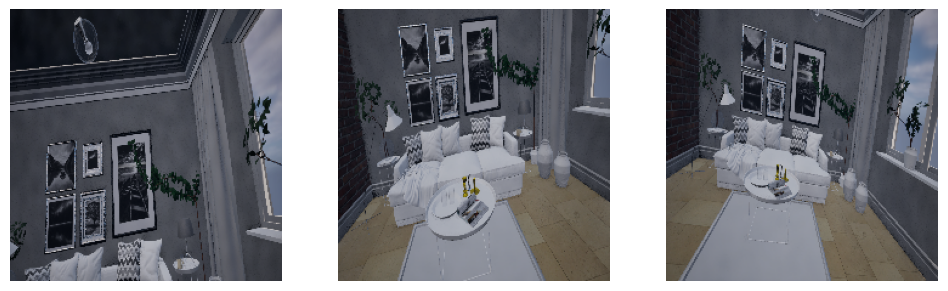

In [13]:
plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(3, 3, i + 1)
    image1 = images[i][0]
    image1 = np.clip(image1, 0, 255).astype(np.uint8)
    
    plt.imshow(image1)
    plt.axis("off")
    
plt.show()